# Statistical Analysis on Hybrid Cars Dataset

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

## Import Data

In [2]:
hybrid = pd.read_excel('hybrid2013.xlsx')

In [3]:
hybrid.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3


## Here, the test is to assess if a $25,000 hybrid vehicle in 2013 is different from the mean msrp.

## No data wrangling required at present

## Test Assumptions - Normality

<Axes: >

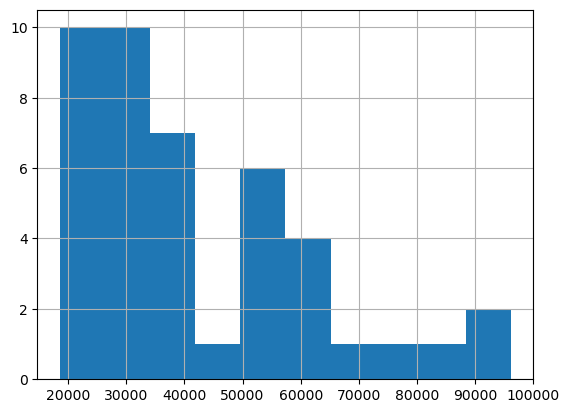

In [5]:
hybrid['msrp'].hist()

## NOT really normally distributed, but continuing for learning purposes.

## Run the Analysis

In [6]:
stats.ttest_1samp(hybrid['msrp'], 25000)

TtestResult(statistic=6.003733172775179, pvalue=3.9231807518835515e-07, df=42)

### Look like the very small p-value indicates a statistically significant difference from the mean.

In [8]:
hybrid.msrp.mean()

42943.48837209302

### With a mean msrp of $42,943, looks like a $25,000 vehicle is a good deal.

## Next, looking at the mpg ratings, determining how a 40mpg compares to the mean.

### First Testing Assumptions

<Axes: >

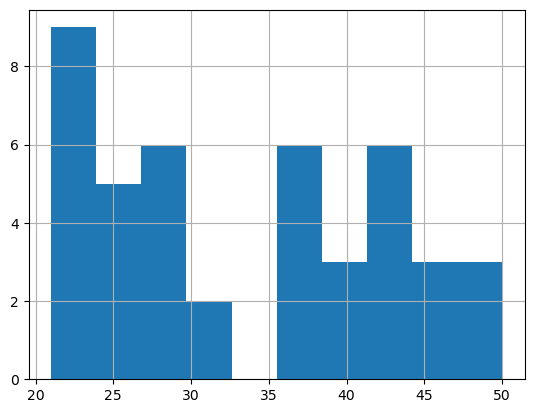

In [10]:
hybrid['mpg'].hist()

### Again, not normally distributed, but continuing for the practice.

In [12]:
stats.ttest_1samp(hybrid['mpg'], 40)

TtestResult(statistic=-4.427320491687408, pvalue=6.67005084670698e-05, df=42)

### The very small p-value would indicated a statistically significant difference.

In [13]:
hybrid.mpg.mean()

33.48837209302326

### With a mean mpg of 33.5, it looks like 40mpg would be a good bit more fuel-effiient than the mean hybrid car in 2013.

## Independent t-test (Here comparing a categorical IV with a continuous DV.)

## import packages

from scipy.stats import ttest_ind

## Test Assumptions - normality, first for compact then mid-size cars

<Axes: >

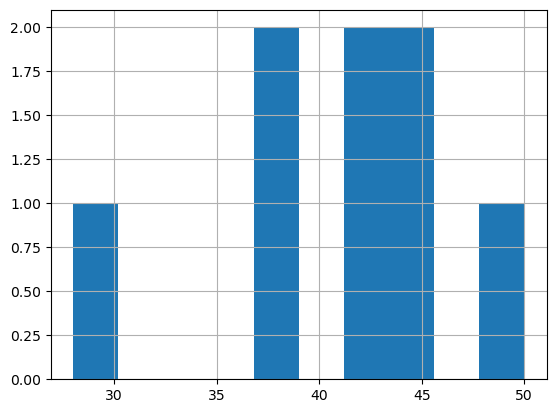

In [16]:
hybrid.mpg[hybrid.carclass == 'C'].hist()

<Axes: >

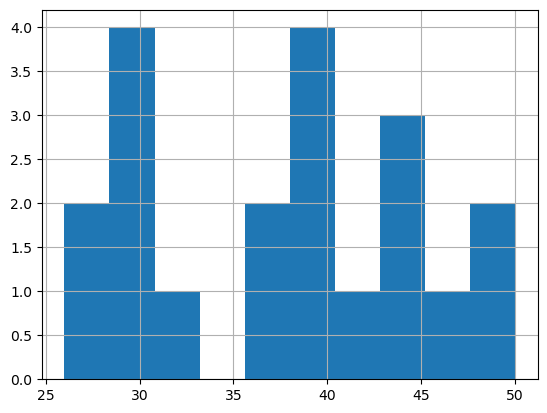

In [17]:
hybrid.mpg[hybrid.carclass == 'M'].hist()

## This is not exactly a nice bell-shaped curve sort of dataset, but pressing on.

## Run the Analysis

In [20]:
stats.ttest_ind(hybrid.mpg[hybrid.carclass == 'C'], hybrid.mpg[hybrid.carclass == 'M'])

Ttest_indResult(statistic=1.0751886097093057, pvalue=0.29216712457079796)

## With a p-value of 0.29 it looks like there really is not a statistically significant difference in mpg between the two classes of cars.

### Let's take a look at the means

In [21]:
hybrid.mpg[hybrid.carclass == 'C'].mean()

40.75

In [22]:
hybrid.mpg[hybrid.carclass == 'M'].mean()

37.4

### This teaches that looks can be deceiving. While it would be expected that 40.75 and 37.4 would be significantly different, our statistics show that they are not as different as might be expected.

## Next, running another Independent t-test to see the difference in mpg between compact and large cars.

## Test Assumptions - normality (Here only running large because small is above.)

<Axes: >

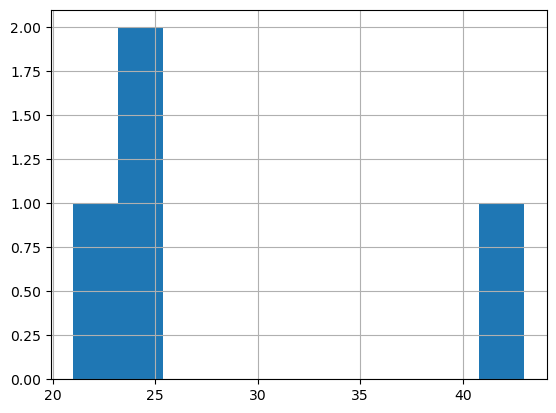

In [24]:
hybrid.mpg[hybrid.carclass == 'L'].hist()

### Fits the pattern. lol

### Running the Analysis

In [25]:
stats.ttest_ind(hybrid.mpg[hybrid.carclass == 'C'], hybrid.mpg[hybrid.carclass == 'L'])

Ttest_indResult(statistic=2.598820461640718, pvalue=0.026545168887970098)

### Here there is a statistically significant difference in mpg between classes.

In [26]:
hybrid.mpg[hybrid.carclass == 'L'].mean()

28.5

### Taking the mpg mean for compact cars from above, we see that 40.75mpg for compact cars is quite a bit more than 28.5mpg for large cars.

## Now, data from 2012 and 2013 will be pulled in to conduct a Dependent t-test

In [28]:
hybrid2 = pd.read_excel('hybrid2012-13.xlsx')

In [29]:
hybrid2.head()

,vehicle,msrp2012,accelrate2012,mpg2012,mpgmpge2012,carclass2012,carclass_id2012,msrp2013,accelrate2013,mpg2013,mpgmpge2013,carclass2013,carclass_id2013
0,ActiveHybrid 3,19006.62,9.35,50,50,C,1,19080,8.70,50,50,C,1
1,ActiveHybrid 5,32095.61,8.82,50,95,M,3,24995,12.66,45,45,C,1
2,Ampera,31739.55,11.11,37,98,C,1,24200,10.20,50,50,M,3
3,Camry LE,62180.23,16.67,26,26,M,3,18600,11.76,42,42,C,1
4,Chevrolet Volt,59126.14,16.95,31,31,M,3,69850,16.39,21,21,SUV,6


### Now, to compare msrp data from 2012 and 2013, we will test assumptions on the two years.

## Test Assumptions - Normality

<Axes: >

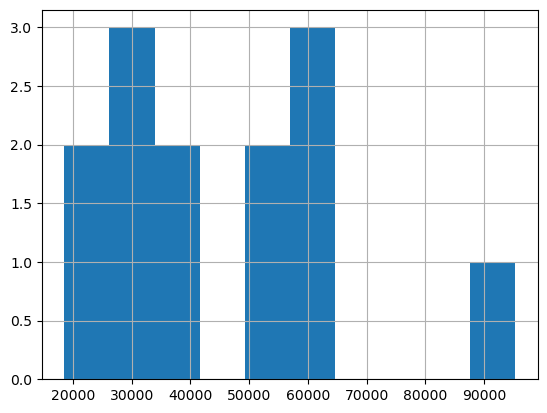

In [30]:
hybrid2['msrp2012'].hist()

<Axes: >

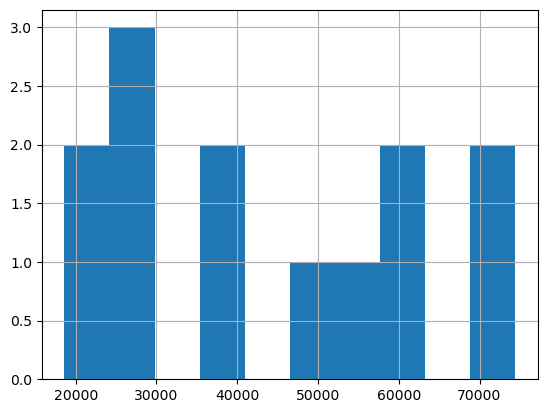

In [31]:
hybrid2['msrp2013'].hist()

## As now expected, not really normally distributed, but proceeding.

## Run the Analysis

In [32]:
stats.ttest_rel(hybrid2['msrp2012'], hybrid2['msrp2013'])

TtestResult(statistic=0.2374965077759743, pvalue=0.8162780348473798, df=12)

### With a p-value of 0.82, looks like no significant change in price between the 2 model years.

## Next, looking at mpg data between the 2 model years

## Test Assumptions

<Axes: >

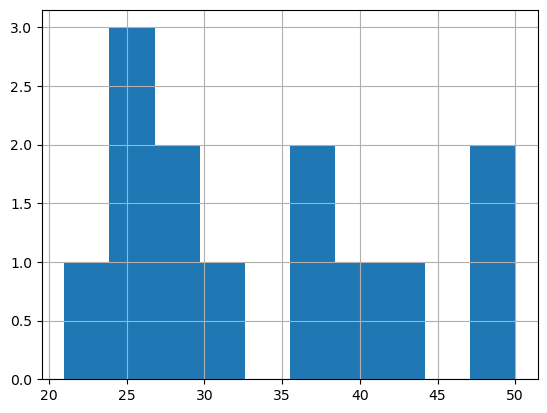

In [33]:
hybrid2['mpg2012'].hist()

<Axes: >

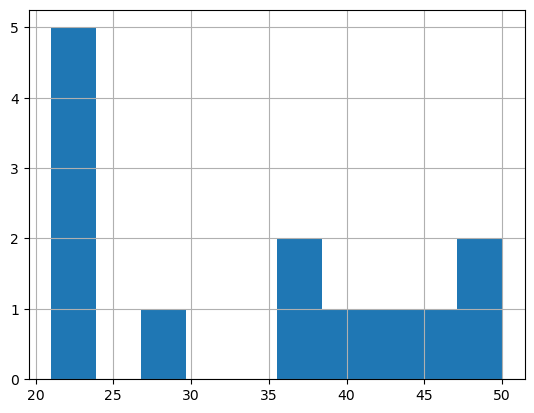

In [34]:
hybrid2['mpg2013'].hist()

### Here is the typical non-normality that's been seen in the data. Carry on.

## Running the Analysis

In [35]:
stats.ttest_rel(hybrid2['mpg2012'], hybrid2['mpg2013'])

TtestResult(statistic=0.14466598084438315, pvalue=0.8873759030512349, df=12)

### With a p-value of 0.89, there is no statistically significant difference in mpg between the 2 model years.